# Paper - Example 1

## Initialize

In [1]:
# Import the pyKasso package
import pykasso as pk

# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0': 0,
    'y0': 0,
    'z0': 0,
    'nx': 300,
    'ny': 300,
    'nz': 1,
    'dx': 10,
    'dy': 10,
    'dz': 10,
}

# Declare the project parameters
app.new_project(project_name='example_01', grid_parameters=grid_parameters)

In [2]:
# Declare the model parameters
model_parameters = {
    'sks' : {},
    'outlets' : {
        'data' : [[2990, 1500]],
        'number' : 1,
        'importance': [1],
    },
    'inlets' : {
        'data' : [[0, 1500]],
        'number': 1,
        'importance': [1],
        'per_outlet': [1],
    },
    'fractures' : {
        # 'seed': 111111,
        'generate': {
            'family_01': {
                'alpha'        : 2,
                'density'      : 0.00005,
                'orientation'  : 135,
                'dip'          : 90,
                'length'       : 300,
            },
            'family_02': {
                'alpha'        : 2,
                'density'      : 0.00005,
                'orientation'  : 45,
                'dip'          : 90,
                'length'       : 500,
            }
        }
    }
}

## Compute

In [3]:
# Compute 100 simulation in a row
for i in range(100):
    model_parameters['sks']['seed'] = i
    app.model.generate(model_parameters=model_parameters)

## Plot results

In [4]:
imshow_options = {'cmap': 'binary'}

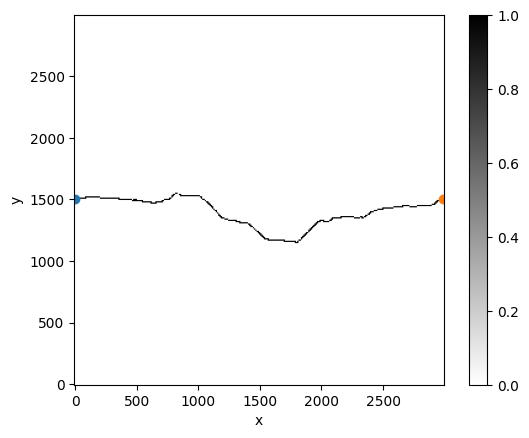

In [5]:
# Plot the last simulated karstic conduit network
f01 = app.visualizer.mpl_plot_2D(feature='karst',
                                 imshow_options=imshow_options,
                                 scatter_inlets_options={},
                                 scatter_outlets_options={},
                                 )
f01.fig.savefig('fig/example_01_karst')
f01.fig

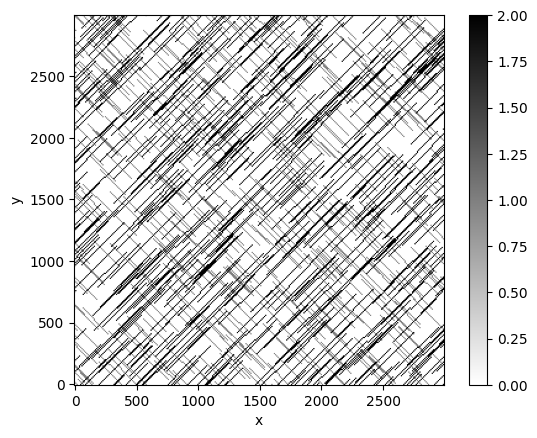

In [6]:
# Plot the fracturation model
f02 = app.visualizer.mpl_plot_2D(feature='fractures',
                                 imshow_options=imshow_options,
                                 )
f02.fig.savefig('fig/example_01_fracturation')
f02.fig

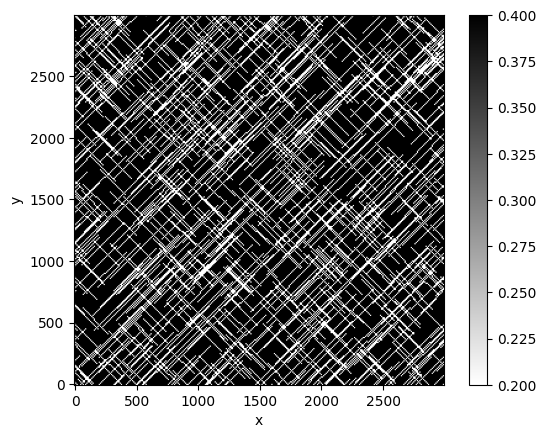

In [7]:
# Plot the cost array
f03 = app.visualizer.mpl_plot_2D(feature='cost',
                                 imshow_options=imshow_options,
                                 )
f03.fig.savefig('fig/example_01_cost')
f03.fig

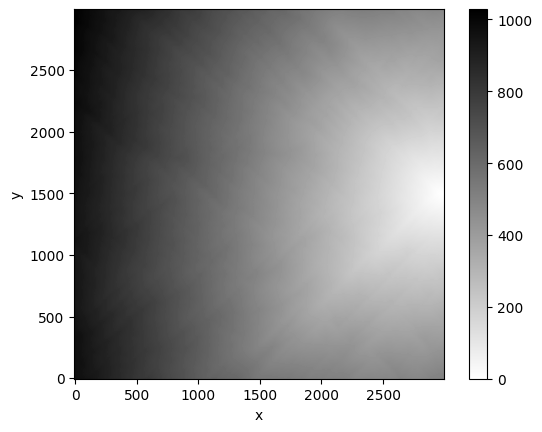

In [8]:
# Plot the time travel array
f04 = app.visualizer.mpl_plot_2D(feature='time',
                                 imshow_options=imshow_options,
                                 )
f04.fig.savefig('fig/example_01_time')
f04.fig

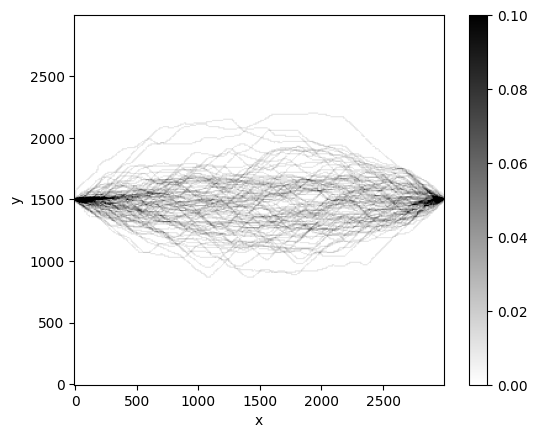

In [9]:
# Compute the mean of all the simulated karstic networks
mean = app.analyzer.compute_stats_on_networks('mean')
extent = app.project.grid.extent
imshow_options = {
    'extent' : extent,
    'cmap' : 'binary',
    'vmin' : 0,
    'vmax' : 0.1
}
f05 = app.visualizer.mpl_plot_array_2D(array=mean,
                                       imshow_options=imshow_options
                                       )
f05.fig.savefig('fig/example_01_mean_karstic_network')
f05.fig